## Génération de figures pour le chapitre « Statistique descriptive ».

In [54]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [58]:
plt.rc('font', **{'family':'sans', 'size': 20})

matplotlib.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': [r'\usepackage{mathptmx}',]})

In [39]:
import pandas as pd

In [40]:
import scipy.stats as st

In [41]:
import re

## Données de remboursement

In [42]:
df = pd.read_csv('../data/OPEN_BIO_2018_7325.csv')

In [43]:
len(df)

604

In [44]:
df.head()

,AGE,SEXE,BEN_REG,DNB,REM,BSE
0,60,2,93,37,386.97,558.55
1,60,2,93,9609,136058.49,145885.70
2,60,2,93,90,1054.98,1370.40
3,60,2,93,69,1020.73,1053.50
4,60,2,93,22,287.95,336.65


### Création d'un sous-échantillon

In [9]:
# indices = np.random.permutation(len(df))[:20]
# indices.sort()
# indices
indices = np.array([ 35,  54,  91,  97, 100, 120, 130, 159, 168, 176, 195, 289, 329, 388, 404, 424, 499, 504, 536, 555])

In [10]:
df_small = df.iloc[indices]

In [11]:
print(df_small)

     AGE  SEXE  BEN_REG   DNB       REM       BSE
35    60     2       76    26    377.96    402.80
54    60     2       75  1401  14054.37  21332.15
91    60     2       44  5299  65928.93  80447.00
97    60     2       32  1706  25137.65  26032.65
100   60     2       32  2596  37877.02  39336.15
120   60     2       27    14    159.85    211.35
130   60     2       24  3565  50770.46  54076.15
159   60     2       11   396   5226.55   6060.05
168   60     2        5   260   4496.91   4676.40
176   60     1       93   162   2303.56   2466.10
195   60     1       76   578   8499.53   8793.10
289   40     2       76    13    172.26    199.80
329   40     2       44   102   1204.93   1557.20
388   40     2       11    48    555.39    733.05
404   40     1       84    14    190.21    217.85
424   40     1       32   126   1350.06   1912.15
499   20     2       32   749   7941.69  11362.40
504   20     2       32    24    289.35    365.25
536   20     2        5   918   9704.10  16550.40


In [45]:
latex_str = df_small.to_string(header=False,index=False)

In [57]:
latex_str = re.sub(' +', ' & ', latex_str)

In [58]:
latex_str

' & 60 & 2 & 76 & 26 & 377.96 & 402.80\n & 60 & 2 & 75 & 1401 & 14054.37 & 21332.15\n & 60 & 2 & 44 & 5299 & 65928.93 & 80447.00\n & 60 & 2 & 32 & 1706 & 25137.65 & 26032.65\n & 60 & 2 & 32 & 2596 & 37877.02 & 39336.15\n & 60 & 2 & 27 & 14 & 159.85 & 211.35\n & 60 & 2 & 24 & 3565 & 50770.46 & 54076.15\n & 60 & 2 & 11 & 396 & 5226.55 & 6060.05\n & 60 & 2 & 5 & 260 & 4496.91 & 4676.40\n & 60 & 1 & 93 & 162 & 2303.56 & 2466.10\n & 60 & 1 & 76 & 578 & 8499.53 & 8793.10\n & 40 & 2 & 76 & 13 & 172.26 & 199.80\n & 40 & 2 & 44 & 102 & 1204.93 & 1557.20\n & 40 & 2 & 11 & 48 & 555.39 & 733.05\n & 40 & 1 & 84 & 14 & 190.21 & 217.85\n & 40 & 1 & 32 & 126 & 1350.06 & 1912.15\n & 20 & 2 & 32 & 749 & 7941.69 & 11362.40\n & 20 & 2 & 32 & 24 & 289.35 & 365.25\n & 20 & 2 & 5 & 918 & 9704.10 & 16550.40\n & 20 & 1 & 11 & 106 & 1073.32 & 1618.35'

In [59]:
latex_str = re.sub('\n &', '\\ \n', latex_str)

In [49]:
latex_str.replace('\t', ';')

' 60  2  76    26    377.96    402.80\n 60  2  75  1401  14054.37  21332.15\n 60  2  44  5299  65928.93  80447.00\n 60  2  32  1706  25137.65  26032.65\n 60  2  32  2596  37877.02  39336.15\n 60  2  27    14    159.85    211.35\n 60  2  24  3565  50770.46  54076.15\n 60  2  11   396   5226.55   6060.05\n 60  2   5   260   4496.91   4676.40\n 60  1  93   162   2303.56   2466.10\n 60  1  76   578   8499.53   8793.10\n 40  2  76    13    172.26    199.80\n 40  2  44   102   1204.93   1557.20\n 40  2  11    48    555.39    733.05\n 40  1  84    14    190.21    217.85\n 40  1  32   126   1350.06   1912.15\n 20  2  32   749   7941.69  11362.40\n 20  2  32    24    289.35    365.25\n 20  2   5   918   9704.10  16550.40\n 20  1  11   106   1073.32   1618.35'

### Tables de fréquences (small dataset)

In [200]:
regions = unique(df_small['BEN_REG'])
ages = unique(df_small['AGE'])

In [71]:
counts = [len(np.where(df_small['AGE']==class_idx)[0]) for class_idx in ages]

In [76]:
frequencies = [float(count)/len(df_small) for count in counts]

In [77]:
print(['%.2f' % freq for freq in frequencies])

['0.20', '0.25', '0.55']


In [80]:
['%.2f' % freq for freq in [float(len(np.where(df_small['AGE']==class_idx)[0]))/(len(df_small)) \
                                for class_idx in ages]]

['0.20', '0.25', '0.55']

In [81]:
['%.2f' % freq for freq in [float(len(np.where(df['AGE']==class_idx)[0]))/(len(df)) \
                                for class_idx in ages]]

['0.19', '0.31', '0.43']

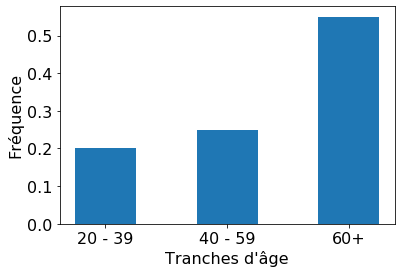

In [91]:
plt.bar(range(len(ages)), frequencies, width=0.5, tick_label=['20 ­ 39', '40 ­ 59', '60+'])
plt.xlabel("Tranche d'âge")
plt.ylabel("Fréquence")
#plt.savefig('../poly/figures/stats/remboursement_age_bars.png', bbox_inches='tight')

### Tables de fréquences (full dataset)

In [45]:
regions = unique(df['BEN_REG'])
ages = unique(df['AGE'])

In [46]:
df = df[df['BEN_REG']!=99]

In [47]:
regions = unique(df['BEN_REG'])
ages = unique(df['AGE'])

In [48]:
counts = [len(np.where(df['AGE']==class_idx)[0]) for class_idx in ages]

In [49]:
frequencies = [float(count)/len(df) for count in counts]

In [50]:
print(['%.2f' % freq for freq in frequencies])

['0.07', '0.18', '0.31', '0.44']


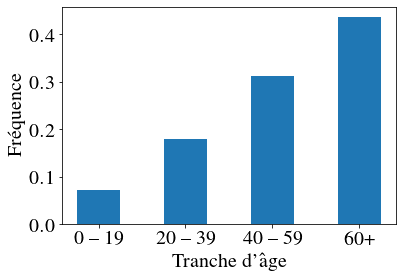

In [154]:
plt.bar(range(len(ages)), frequencies, width=0.5, tick_label=['0 -- 19', '20 -- 39', '40 -- 59', '60+'])
plt.xlabel("Tranche d'âge")
plt.ylabel("Fréquence")
plt.savefig('../poly/figures/stats/remboursement_age_bars.pdf', bbox_inches='tight')

### Montants remboursés par acte, par tranche d'âge (small dataset)

In [21]:
rem_par_acte = df_small['REM']/df_small['DNB']

In [22]:
rpa_stratified = [rem_par_acte[df_small['AGE'] == age] for age in ages]

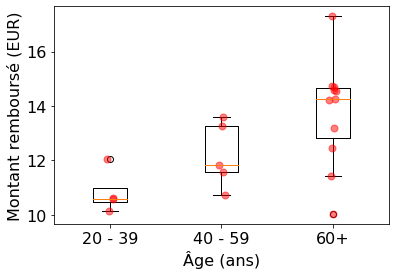

In [187]:
fig = plt.figure(figsize=(6, 4))
plt.boxplot(rpa_stratified)
for (ix, age) in enumerate(ages):
    #plt.boxplot(y)
    y = rem_par_acte[df_small['AGE'] == age]
    x = np.random.normal((ix+1), 0.02, size=len(y))
    plot(x, y, alpha=0.5, ms=14)
plt.xlabel('Âge (ans)')
plt.ylabel('Montant remboursé (EUR)')
t=plt.xticks([1, 2, 3], ['20 ­ 39', '40 ­ 59', '60+'])
#plt.savefig('../poly/figures/stats/remboursement_rembourses_age.png', bbox_inches='tight')

In [208]:
rpa_var = [np.std(r)**2 for r in rpa_stratified]
rpa_len = [len(r) for r in rpa_stratified]
sr = np.sum(np.array(rpa_len)*np.array(rpa_var))/len(df_small)
print("Variance résiduelle : %.2f" % sr)

Variance résiduelle : 2.27


In [210]:
rpa_dist2 = [(np.mean(r) - np.mean(rem_par_acte))**2 for r in rpa_stratified]
se = np.sum(np.array(rpa_len)*np.array(rpa_dist2))/len(df_small)
print("Variance expliquée par l'âge : %.2f" % se)

Variance expliquée par l'âge : 1.37


In [206]:
print("Variance totale : %.2f" % (np.std(rem_par_acte)**2))

Variance totale : 3.65


In [212]:
print("Rapport de corrélation : %.2f" % (se/np.std(rem_par_acte)**2))

Rapport de corrélation : 0.38


### Montants remboursés par acte, par tranche d'âge (full dataset)

In [61]:
rem_par_acte = df['REM']/df['DNB']

In [62]:
rpa_stratified = [rem_par_acte[df['AGE'] == age] for age in ages]

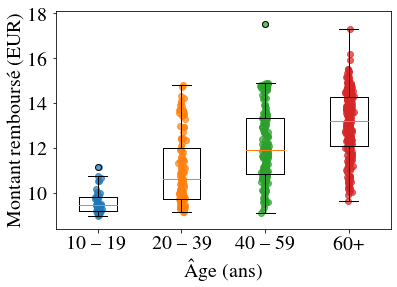

In [156]:
fig = plt.figure(figsize=(6, 4))
plt.boxplot(rpa_stratified)
for (ix, age) in enumerate(ages):
    #plt.boxplot(y)
    y = rem_par_acte[df['AGE'] == age]
    x = np.random.normal((ix+1), 0.02, size=len(y))
    plt.scatter(x, y, alpha=0.7)
plt.xlabel('Âge (ans)')
plt.ylabel('Montant remboursé (EUR)')
t=plt.xticks([1, 2, 3, 4], ['10 -- 19', '20 -- 39', '40 -- 59', '60+'])
plt.savefig('../poly/figures/stats/remboursement_rembourses_age.pdf', bbox_inches='tight')

In [27]:
rpa_var = [np.std(r)**2 for r in rpa_stratified]
rpa_len = [len(r) for r in rpa_stratified]
sr = np.sum(np.array(rpa_len)*np.array(rpa_var))/len(df)
print("Variance résiduelle : %.2f" % sr)

Variance résiduelle : 2.22


In [28]:
rpa_dist2 = [(np.mean(r) - np.mean(rem_par_acte))**2 for r in rpa_stratified]
se = np.sum(np.array(rpa_len)*np.array(rpa_dist2))/len(df)
print("Variance expliquée par l'âge : %.2f" % se)

Variance expliquée par l'âge : 1.09


In [29]:
print("Variance totale : %.2f" % (np.std(rem_par_acte)**2))

Variance totale : 3.30


In [30]:
print("Rapport de corrélation : %.2f" % (se/np.std(rem_par_acte)**2))

Rapport de corrélation : 0.33


### Contingence et barres empilées (small dataset)

In [31]:
df_small[(df_small['BEN_REG'] == 32) & (df_small['AGE'] == 40)] 

,AGE,SEXE,BEN_REG,DNB,REM,BSE
424,40,1,32,126,1350.06,1912.15


In [19]:
contingence = [[len(df_small[(df_small['BEN_REG'] == reg) & (df_small['AGE'] == age)]) \
                for reg in regions] for age in ages]

In [20]:
contingence

[[1, 1, 0, 0, 2, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 1, 0, 1, 1, 0],
 [1, 1, 1, 1, 2, 1, 1, 2, 0, 1]]

In [23]:
n_tot = np.sum(contingence)
n_tot

20

In [25]:
n_col = np.sum(contingence, axis=0)
n_col

array([2, 3, 1, 1, 5, 2, 1, 3, 1, 1])

In [26]:
n_lig = np.sum(contingence, axis=1)
n_lig

array([ 4,  5, 11])

In [33]:
n_col = n_col.reshape((len(n_col), 1))
n_lig = n_lig.reshape((len(n_lig), 1))

In [46]:
expected = n_lig.dot(n_col.T)/(n_tot)
np.sum((contingence - expected)**2/expected)

In [66]:
regions_dict = {5: "Régions et Départements d’outre-mer",
                11: "Ile-de-France",
                24: "Centre-Val de Loire",
                27: "Bourgogne-Franche-Comté",
                32: "Hauts-de-France",
                44: "Grand-Est",
                75: "Nouvelle-Aquitaine",
                76: "Occitanie",
                84: "Auvergne-Rhône-Alpes",
                93: "Provence-Alpes-Côte d’Azur et Corse"}

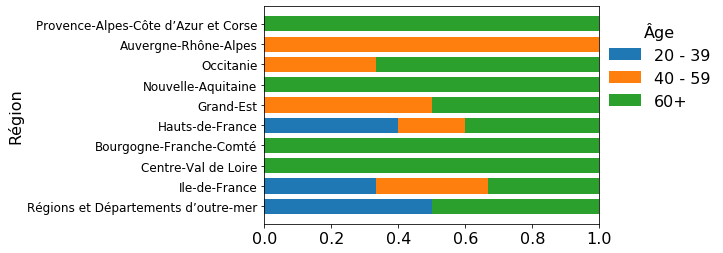

In [151]:
age_ranges = ['20 ­ 39', '40 ­ 59', '60+']
labels = [regions_dict[r] for r in regions]
# Percentage of individuals in this age range within each region
profils_lig = np.array(contingence)/np.repeat(n_col.T, 3, axis=0)
previous_profile = np.zeros((len(labels), ))
for age_idx, profile in enumerate(profils_lig):
    # print(profile)
    plt.barh(labels, profile, height=0.75, left=previous_profile, label=age_ranges[age_idx])
    previous_profile += profile
plt.yticks(fontsize=12)
plt.legend(title="Âge", loc=(1.01, 0.5), frameon=False)
plt.ylabel("Région")
#plt.savefig('../poly/figures/stats/remboursement_age_region_cols.png', bbox_inches='tight')

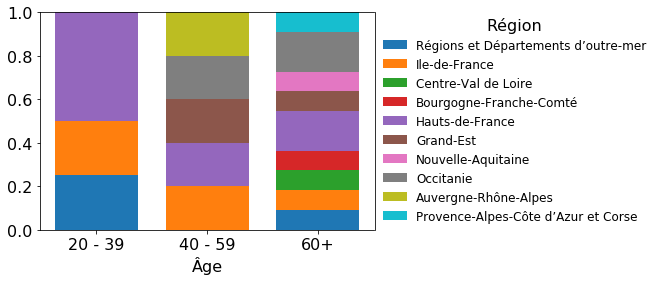

In [153]:
labels = ['20 ­ 39', '40 ­ 59', '60+']
region_names = [regions_dict[r] for r in regions]

profils_col = np.array(contingence)/np.repeat(n_lig, 10, axis=1)
previous_profile = np.zeros((len(labels), ))
for r_idx, profile in enumerate(profils_col.T):
    plt.bar(labels, profile, width=0.75, bottom=previous_profile, label=region_names[r_idx])
    previous_profile += profile

plt.legend(title="Région", loc=(1.01, 0.01), frameon=False, fontsize=12)
plt.xlabel("Âge")
#plt.savefig('../poly/figures/stats/remboursement_age_region_lines.png', bbox_inches='tight')

### Contingence et barres empilées (full dataset)

In [67]:
contingence = [[len(df[(df['BEN_REG'] == reg) & (df['AGE'] == age)]) \
                for reg in regions] for age in ages]

In [68]:
regions

array([ 5, 11, 24, 27, 28, 32, 44, 52, 53, 75, 76, 84, 93])

In [69]:
contingence

[[3, 5, 3, 3, 3, 3, 4, 3, 2, 3, 3, 4, 4],
 [8, 18, 4, 7, 4, 9, 11, 6, 4, 7, 8, 10, 11],
 [11, 26, 11, 13, 13, 16, 15, 10, 8, 12, 17, 15, 19],
 [15, 31, 18, 16, 21, 21, 22, 12, 12, 19, 24, 23, 26]]

In [70]:
n_tot = np.sum(contingence)
n_tot

596

In [71]:
n_col = np.sum(contingence, axis=0)
n_col

array([37, 80, 36, 39, 41, 49, 52, 31, 26, 41, 52, 52, 60])

In [72]:
n_lig = np.sum(contingence, axis=1)
n_lig

array([ 43, 107, 186, 260])

In [73]:
n_col = n_col.reshape((len(n_col), 1))
n_lig = n_lig.reshape((len(n_lig), 1))

In [74]:
expected = n_lig.dot(n_col.T)/(n_tot)
np.sum((contingence - expected)**2/expected)

7.439305519032455

In [196]:
regions_dict = {5: "DROM",
                11: "Ile-de-France",
                24: "Centre-Val de Loire",
                27: "Bourgogne-Franche-Comté",
                28: "Normandie",
                32: "Hauts-de-France",
                44: "Grand-Est",
                52: "Pays de la Loire",
                53: "Bretagne",
                75: "Nouvelle-Aquitaine",
                76: "Occitanie",
                84: "Auvergne-Rhône-Alpes",
                93: "PACA et Corse"}

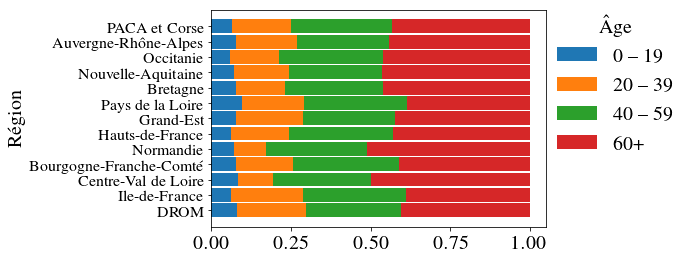

In [197]:
age_ranges = ['0 -- 19', '20 -- 39', '40 -- 59', '60+']
labels = [regions_dict[r] for r in regions]
# Percentage of individuals in this age range within each region
profils_lig = np.array(contingence)/np.repeat(n_col.T, len(ages), axis=0)
previous_profile = np.zeros((len(labels), ))
for age_idx, profile in enumerate(profils_lig):
    plt.barh(labels, profile, height=0.9, left=previous_profile, label=age_ranges[age_idx])
    previous_profile += profile
plt.yticks(fontsize=16)
plt.legend(title="Âge", loc=(1.01, 0.3), frameon=False)
plt.ylabel("Région")
plt.savefig('../poly/figures/stats/remboursement_age_region_cols.pdf', bbox_inches='tight')

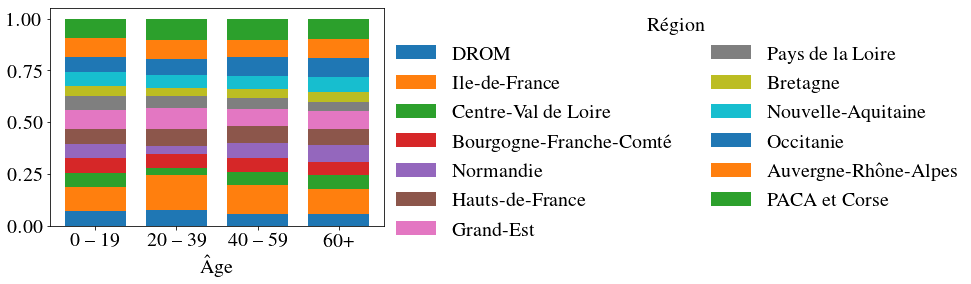

In [198]:
age_ranges = ['0 -- 19', '20 -- 39', '40 -- 59', '60+']
region_names = [regions_dict[r] for r in regions]

profils_col = np.array(contingence)/np.repeat(n_lig, len(regions), axis=1)
previous_profile = np.zeros((len(age_ranges), ))
for r_idx, profile in enumerate(profils_col.T):
    plt.bar(age_ranges, profile, width=0.75, bottom=previous_profile, label=region_names[r_idx])
    previous_profile += profile
plt.legend(title="Région", loc=(1.01, -0.1), frameon=False, ncol=2)
plt.xlabel("Âge")
plt.savefig('../poly/figures/stats/remboursement_age_region_lines.pdf', bbox_inches='tight')

## Données météo

In [86]:
meteo = pd.read_csv('../data/meteo_data.csv')

In [87]:
meteo.head()

,t_min,t_max,t_moy,vent,ensoleillement,precipitations,p_min,p_max
0,7.6,9.6,8.4,22.2,0,0.0,1034.0,1036.6
1,5.6,7.2,6.3,24.1,0,0.0,1037.3,1041.3
2,4.1,6.6,5.4,16.7,0,0.0,1040.2,1041.8
3,3.1,6.0,4.7,20.4,0,0.0,1039.5,1041.7
4,4.2,5.9,5.0,20.4,0,0.0,1037.5,1039.6


In [88]:
t_min = meteo['t_min']

### Transformation en série classée

In [45]:
num_classes = int(1 + np.log2(len(t_min)))

In [46]:
print('%d classes' % num_classes)

5 classes


In [47]:
interval_width = (np.max(t_min) - np.min(t_min))/num_classes

In [48]:
thresholds = [np.min(t_min) + i*interval_width for i in range(num_classes)]
thresholds.append(np.max(t_min))
thresholds[0] = np.min(t_min) - 0.1

In [49]:
print(['%.1f' % x for x in thresholds])

['-2.5', '-0.2', '2.1', '4.3', '6.6', '8.8']


In [50]:
interval_width

2.24

In [51]:
bin_assignment = pd.cut(t_min, bins=thresholds, labels=range(num_classes))

In [52]:
counts = [len(np.where(bin_assignment==class_idx)[0]) for class_idx in range(num_classes)]

In [53]:
frequencies = [float(count)/len(t_min) for count in counts]

In [104]:
print(['%.2f' % freq for freq in frequencies])

['0.19', '0.19', '0.29', '0.10', '0.23']


### Histogramme

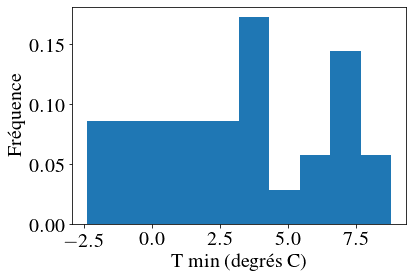

In [157]:
t = plt.hist(t_min, bins=10, density=True)
plt.xlabel('T min (degrés C)')
plt.ylabel('Fréquence')
plt.savefig('../poly/figures/stats/meteo_tmin_hist.pdf', bbox_inches='tight')

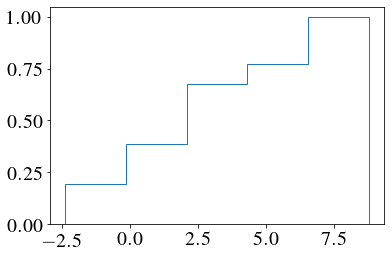

In [92]:
(y_hist, x_hist, t) = plt.hist(t_min, bins=5, density=True, cumulative=True, histtype='step')

In [93]:
x_hist, y_hist

(array([-2.4 , -0.16,  2.08,  4.32,  6.56,  8.8 ]),
 array([0.19354839, 0.38709677, 0.67741935, 0.77419355, 1.        ]))

In [94]:
y_increasing = [0.]
y_increasing.extend(y_hist)

In [95]:
y_decreasing = [1.]
y_decreasing.extend(1.-y_hist)

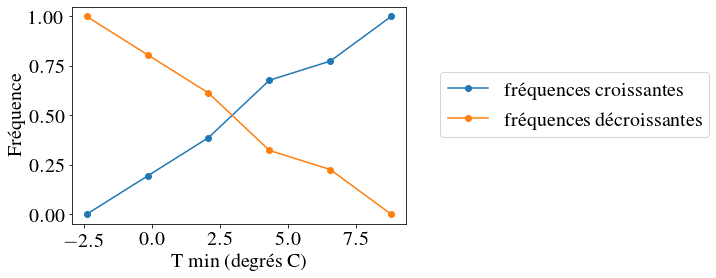

In [158]:
plt.plot(x_hist, y_increasing, marker='o', label='fréquences croissantes')
plt.plot(x_hist, y_decreasing, marker='o', label='fréquences décroissantes')
plt.legend(loc=(1.1, 0.4))
plt.xlabel('T min (degrés C)')
plt.ylabel('Fréquence')
plt.savefig('../poly/figures/stats/meteo_tmin_cumul_freq.pdf', bbox_inches='tight')

### Indicateurs univariés

In [60]:
np.mean(t_min)

3.222580645161291

In [61]:
np.median(t_min)

4.0

In [62]:
np.mean((t_min-np.mean(t_min))**2)

10.022393340270552

In [63]:
np.mean((t_min-np.mean(t_min))**2)*len(t_min)/(len(t_min)-1)

10.356473118279572

In [64]:
np.sqrt(np.mean((t_min-np.mean(t_min))**2))

3.1658163781670208

In [65]:
np.sqrt(np.mean((t_min-np.mean(t_min))**2)*len(t_min)/(len(t_min)-1))

3.2181474668323657

In [66]:
np.quantile(t_min, [0.25, 0.50, 0.75])

array([0.75, 4.  , 5.55])

In [67]:
np.median(t_min)

4.0

### Boxplot

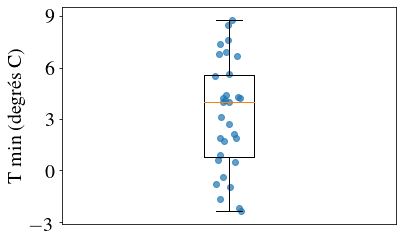

In [162]:
plt.boxplot(t_min)
x = np.random.normal(1, 0.02, size=len(t_min))
plt.scatter(x, t_min, alpha=0.7)
plt.ylabel('T min (degrés C)')
plt.xticks([], [''])
plt.yticks(np.arange(-3, 12, 3))
plt.savefig('../poly/figures/stats/meteo_tmin_boxplot.pdf', bbox_inches='tight')

### Scatterplots

In [107]:
t_max = meteo['t_max']

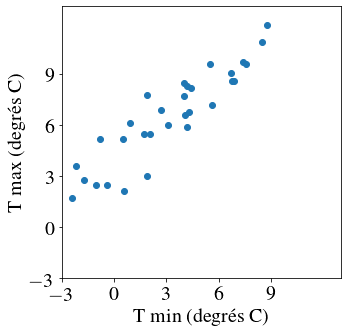

In [163]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(t_min, t_max)
plt.xlim([-3, 13])
plt.ylim([-3, 13])
plt.xticks(np.arange(-3, 12, 3))
plt.yticks(np.arange(-3, 12, 3))
plt.xlabel('T min (degrés C)')
plt.ylabel('T max (degrés C)')
plt.savefig('../poly/figures/stats/meteo_tmin_tmax.pdf', bbox_inches='tight')

In [111]:
vent = meteo['vent']

In [112]:
t_min_std = (t_min - np.mean(t_min))/np.std(t_min)
t_max_std = (t_max - np.mean(t_max))/np.std(t_max)
vent_std = (vent - np.mean(vent))/np.std(vent)

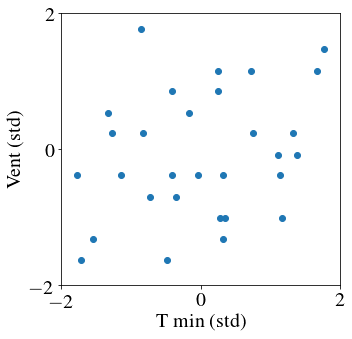

In [164]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(t_min_std, vent_std)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xticks(ticks=[-2, 0, 2])
plt.yticks(ticks=[-2, 0, 2])
plt.xlabel('T min (std)')
plt.ylabel('Vent (std)')
plt.savefig('../poly/figures/stats/meteo_tmin_vent.pdf', bbox_inches='tight')

### Corrélations

In [117]:
print("Covariance(t_min, t_max) = %.2f" % np.mean((t_min - np.mean(t_min))*(t_max - np.mean(t_max))))

Covariance(t_min, t_max) = 7.69


In [118]:
print("Pearson(t_min, t_max) = %.2f" % st.pearsonr(t_min, t_max)[0])

Pearson(t_min, t_max) = 0.91


In [119]:
print("Pearson(t_min, vent) = %.2f" % st.pearsonr(t_min, vent)[0])

Pearson(t_min, vent) = 0.28


In [166]:
x = np.random.random(size=(100,))

In [183]:
y =  np.random.random(size=(100,))
print("r(x, y) = %.2f" % (st.pearsonr(x, y)[0]))

r(x, y) = 0.03


In [199]:
plt.rc('font', **{'family':'sans', 'size': 26})

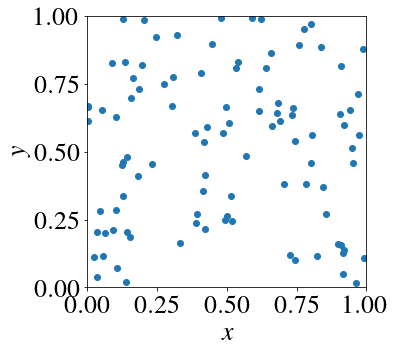

In [200]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks(ticks=[0., 0.25, 0.50, 0.75, 1.00])
t=plt.yticks(ticks=[0., 0.25, 0.50, 0.75, 1.00])
plt.xlabel('$x$')
t=plt.ylabel('$y$')
plt.savefig('../poly/figures/stats/pearson_0.pdf', bbox_inches='tight')


In [185]:
y2 = x + 0.1 * (np.random.random(size=(100,))-0.5)
print("r(x, y2) = %.2f" % (st.pearsonr(x, y2)[0]))

r(x, y2) = 1.00


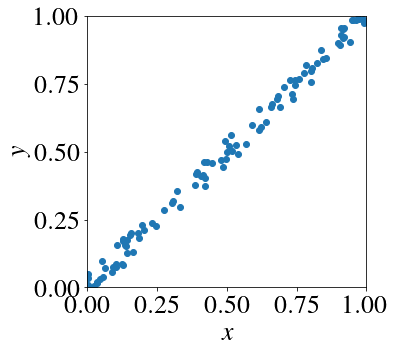

In [201]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(x, y2)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks(ticks=[0., 0.25, 0.50, 0.75, 1.00])
t=plt.yticks(ticks=[0., 0.25, 0.50, 0.75, 1.00])
plt.xlabel('$x$')
t=plt.ylabel('$y$')
plt.savefig('../poly/figures/stats/pearson_1.pdf', bbox_inches='tight')

In [188]:
y3 = x + 1.75*(np.random.random(size=(100,))-0.5)
print("r(x, y3) = %.2f" % (st.pearsonr(x, y3)[0]))

r(x, y3) = 0.53


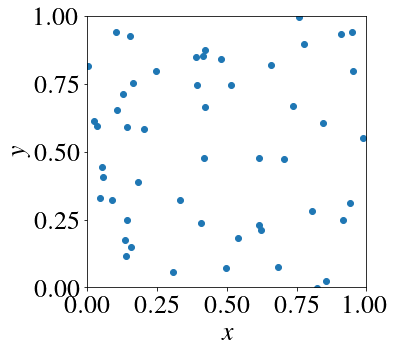

In [202]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(x, y3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks(ticks=[0., 0.25, 0.50, 0.75, 1.00])
t=plt.yticks(ticks=[0., 0.25, 0.50, 0.75, 1.00])
plt.xlabel('$x$')
t=plt.ylabel('$y$')
plt.savefig('../poly/figures/stats/pearson_2.pdf', bbox_inches='tight')

In [190]:
y4 = - x + 0.08 * (np.random.random(size=(100,))-0.5)
print("r(x, y4) = %.2f" % (st.pearsonr(x, y4)[0]))

r(x, y4) = -1.00


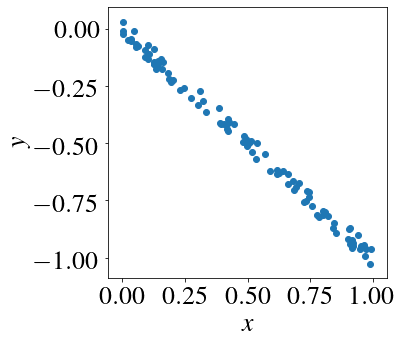

In [203]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(x, y4)
plt.xticks(ticks=[0., 0.25, 0.50, 0.75, 1.00])
t=plt.yticks(ticks=[-1.00, -0.75, -0.50, -0.25, 0.])
plt.xlabel('$x$')
t=plt.ylabel('$y$')
plt.savefig('../poly/figures/stats/pearson_3.pdf', bbox_inches='tight')